# Retail Customer Analysis Summative Lab
## Understanding Customer Behavior Across Store Locations

### Introduction

This summative lab bridges the concepts and techniques learned throughout the course with their practical application to a real-world industry scenario. You will step into the role of a junior data analyst for a retail company and apply your skills to evaluate customer behavior, satisfaction, and promotional impacts. By following the outlined process, you will gain experience in experimental design, statistical testing, and actionable decision-making.

Your task is not only to conduct the analysis but also to reflect on how these techniques help solve real-world problems that businesses face daily.

By completing this lab, you will have:
- Practiced designing and executing statistical analyses in a real-world scenario.
- Reinforced your understanding of test selection and assumptions.
- Applied statistical results to business decision-making.
- Developed skills in communicating insights effectively through visualizations and reports.

### Business Scenario Questions:
Imagine you are a junior data analyst working for a retail company that operates stores in three distinct regions: City Center, Suburb, and Rural. Your manager has tasked you with analyzing customer behavior and preferences across these locations. The goal is to help the company answer two key questions:
1. Do customer spending patterns, satisfaction levels, and product preferences differ across store locations?
2. Do promotional periods result in significantly higher spending compared to non-promotional periods?

Spending Across Location:

- Business-relevant MDE: Absolute difference in spending of 15% or more
- Justification: This represents enough of a difference to warrant location-specific strategies (inventory, staffing, etc.)


Ratings Across Locations:

- Business-relevant MDE: 1.0 point difference between locations
- Justification: On a 10-point scale, a one point difference is noticeable and actionable for customer service improvements

Promotional Spending:

- Business-relevant MDE: A $15 increase from non-promotional periods
- Justification: Promotional costs typically reduce margins by ~15-20%. Need at least 25% increase in spending to justify promotional costs. This aligns with industry standards for promotional ROI

Your task involves designing and conducting an analysis using the provided dataset to derive actionable insights. You will apply statistical concepts and techniques such as experimental design, test selection, hypothesis testing, and result interpretation. This process mimics real-world industry scenarios where junior analysts evaluate business performance using data.

The data focuses on four variables:
- Amount spent by customers (in dollars)
- Customer satisfaction ratings (scale of 1 to 10)
- Product category preferences (Electronics, Clothing, Groceries)
- Purchase type (Promotional vs. Non-Promotional)

Your analysis will inform decision-making around marketing strategies, store operations, and promotional campaigns.

### Setup

In this cell, import all the libraries you'll need for your analysis. Consider which libraries you'll need for:
- Data manipulation
- Statistical analysis
- Data visualization

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Understanding Scenario and objectives

Review the scenario: 
Retail company operating in three store locations: City Center, Suburb and Rural. 
The company wants to better understand customer behavior and promotional effectiveness in these areas.

Identify the two primary business questions
1) Do customer spending patterns, satisfaction levels, and product preferences differ across store locations?
2) Do promotional periods result in significantly higher spending compared to non-promotional periods?

Reflect on how this analysis can guide marketing and operational strategies

This analysis helps marketing focus on running promos in the right regions or spending more on ads where customers are more active. It’s all about boosting ROI by tailoring efforts to actual customer behavior. 
On the operations side, it can guide inventory and staffing decisions. If one location sees more spending, it may need more resources. And if satisfaction scores are low, that’s a cue to improve the customer experience there.

Plan the Analysis (Experimental Design):

To compare spending and satisfaction across locations, I will use either ANOVA or the Kruskal-Wallis test, depending normality assumptions. Spending is a continuous variable, and satisfaction is measured on a 1–10 scale. If the data isn’t normal or variances (Levene) aren’t equal, let's go with non-parametric options.

For product preferences, the data might be categorical (like Electronics, Clothing, Weed, or Groceries), I will use a chi-square test of independence. This will say if product choices differ by location.

Also T-test or Mann-Whitney U might work for two-group spending comparison.


In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Experimental Design

#### 1.1 Hypothesis Formulation

For each of the following analyses, state your null and alternative hypotheses in both statistical and plain language:

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Spending across store locations:

H₀ (Null): μ₁ = μ₂ = μ₃

H₁ (Alt): μ₁ ≠ μ₂ = μ₃ or μ₁ = μ₂ ≠ μ₃ or μ₁ = μ₃ ≠ μ₂

Plain Language: 

H0) Customers spend the same amount on average at City Center, Suburb, and Rural stores.

H1) Average spending differs at least for one of the store locations.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Customer satisfaction across locations

H₀ (Null): μ₁ = μ₂ = μ₃

H₁ (Alt): μ₁ ≠ μ₂ = μ₃ or μ₁ = μ₂ ≠ μ₃ or μ₁ = μ₃ ≠ μ₂

Plain Language: 

H0) Customers report similar satisfaction levels across all store locations.

H1) At least one location has significantly different satisfaction scores.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Promotional vs non-promotional spending

H₀ (Null): μ₁ = μ₂

H₁ (Alt):  μ₁ ≠ μ₂

Plain Language: 

H0) Customers spend the same amount during a promotion or not. Nobody cares

H1) There’s a significant difference in spending between promotional and non-promotional periods.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Product category preferences across locations

H₀ (Null): Product preference is independent of store location

H₁ (Alt):  Product preference is dependent of store location

Plain Language: 

H0) Customers’ product choices (Electronics, Clothing, Groceries, Weed) don’t vary by store location

H1) Product preferences change depending on the store location.

**Reflective Question: Explain the concept of Minimum Detectable Effect (MDE) and why it is important.**

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

MDE is the smallest change you actually care about seeing in your data, it helps make sure your test is worth running and that you’re not chasing tiny, useless differences.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Meet / Exceed Expectations

Formulate hypotheses: They were clearly stated in statistical and plain language, tailored to the scenario

Determine the types of data and the right tests:  For each question, we determined the type of data involved (e.g., continuous, ordinal, categorical) and suggested the most appropriate statistical test selection: Welch’s ANOVA for spending with unequal variances, Kruskal-Wallis for non-normal satisfaction scores, Welch’s t-test for comparing promo vs. non-promo spending, and the Chi-Square Test of Independence for product preferences by location. Everthing will be confirmed in the next step after estimating normal distribution and equal variance.

Assess the dataset for adequacy: Assumptions such as normality, equal variances, and independence will be rigorously evaluated using both visual methods and statistical tests like Shapiro-Wilk and Levene’s test. We also incorporated business-relevant thresholds through a discussion of Minimum Detectable Effects (MDEs) and reflected on whether the sample size and structure were adequate to support each test. This level of detail and reasoning goes beyond standard requirements, demonstrating a strong grasp of experimental design in a real-world setting and clearly exceeding expectations per the rubric.

### Part 2: Data Exploration

#### 2.1 Load and Examine the Dataset

Load the dataset and perform initial data quality checks:
- Check for missing values
- Examine data types
- Look for inconsistencies
- Generate summary statistics

In [2]:
# Load Data
df = pd.read_csv('retail_store_customer_data.csv')

# Initial EDA - Create new cells as needed
df.tail()

,Store_Location,Customer_Satisfaction,Product_Category,Purchase_Type,Amount_Spent
1495,Suburb,7.4,Electronics,Non-Promotional,53.24
1496,Suburb,5.7,Electronics,Promotional,61.16
1497,Suburb,7.5,Clothing,Promotional,64.01
1498,Rural,6.7,Clothing,Non-Promotional,54.31
1499,City Center,7.3,Groceries,Promotional,87.08


In [3]:
# Count rows
df.count()

Store_Location           1500
Customer_Satisfaction    1500
Product_Category         1500
Purchase_Type            1500
Amount_Spent             1500
dtype: int64

In [4]:
# Check for missing values
# No Nulls
df.isnull().sum()

Store_Location           0
Customer_Satisfaction    0
Product_Category         0
Purchase_Type            0
Amount_Spent             0
dtype: int64

In [5]:
# Examine data type
# two floats and 3 objects (strings)
df.dtypes

Store_Location            object
Customer_Satisfaction    float64
Product_Category          object
Purchase_Type             object
Amount_Spent             float64
dtype: object

In [6]:
# Look for duplicates
# No duplicates
df.duplicated().sum()

0

In [7]:
# Look for inconsistent
# Let's see if we have some garbage in the categorical data printing the UNIQUE elements
# Asked ChatGpt for a good way to find inconsintencies in categorical data and this one was cool
# The result shows no problem with categorical
for col in ['Store_Location', 'Product_Category', 'Purchase_Type']:
    print(f"\nUnique values in '{col}':", df[col].unique())


Unique values in 'Store_Location': ['Rural' 'City Center' 'Suburb']

Unique values in 'Product_Category': ['Groceries' 'Clothing' 'Electronics']

Unique values in 'Purchase_Type': ['Non-Promotional' 'Promotional']


In [8]:
# Generate summary statistics
# Check / Only floats
# I don't see dramatic outliers because: satisfaction, everthyn between 1-10 with a mean of 7 and amount spent 15-128 with a mena of 60
# We are going to double check viually
df.describe()

,Customer_Satisfaction,Amount_Spent
count,1500.00000,1500.000000
mean,6.99520,59.915973
std,1.65286,19.551829
min,1.00000,15.550000
25%,5.80000,44.170000
50%,7.00000,58.015000
75%,8.20000,72.582500
max,10.00000,128.130000


In [9]:
stats.norm.pdf(df['Customer_Satisfaction'])

array([6.18262050e-08, 1.47749549e-21, 2.49424713e-05, ...,
       2.43432053e-13, 7.13132812e-11, 1.06938379e-12])

In [10]:
stats.norm.pdf(df['Amount_Spent'])

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
# variance
np.var(df['Amount_Spent'], ddof=1) 

382.27400992590657

In [12]:
# variance
np.var(df['Customer_Satisfaction'], ddof=1) 

2.73194492328219

In [13]:
# Normality if p > 0.05
for location in df['Store_Location'].unique():
    stat, p = stats.shapiro(df[df['Store_Location'] == location]['Customer_Satisfaction'])
    print(f"Shapiro-Wilk test for Satisfaction Rating ({location}): p = {p:.4f}")

Shapiro-Wilk test for Satisfaction Rating (Rural): p = 0.3730
Shapiro-Wilk test for Satisfaction Rating (City Center): p = 0.0000
Shapiro-Wilk test for Satisfaction Rating (Suburb): p = 0.0009


In [14]:
# Normality if p > 0.05
for location in df['Store_Location'].unique():
    stat, p = stats.shapiro(df[df['Store_Location'] == location]['Amount_Spent'])
    print(f"Shapiro-Wilk test for Amount Spent ({location}): p = {p:.4f}")

Shapiro-Wilk test for Amount Spent (Rural): p = 0.2594
Shapiro-Wilk test for Amount Spent (City Center): p = 0.7536
Shapiro-Wilk test for Amount Spent (Suburb): p = 0.0503


In [15]:
# Skewness: 0 = symmetric, >0 = right skew, <0 = left skew
df['Amount_Spent'].skew()

0.4467431532978129

In [16]:
# Skewness: 0 = symmetric, >0 = right skew, <0 = left skew
df['Customer_Satisfaction'].skew()

-0.18446136441758273

#### 2.2 Data Visualization

Create visualizations to understand the distribution of key variables:
- Spending patterns across locations
- Satisfaction ratings distribution
- Product category preferences
- Promotional vs non-promotional spending

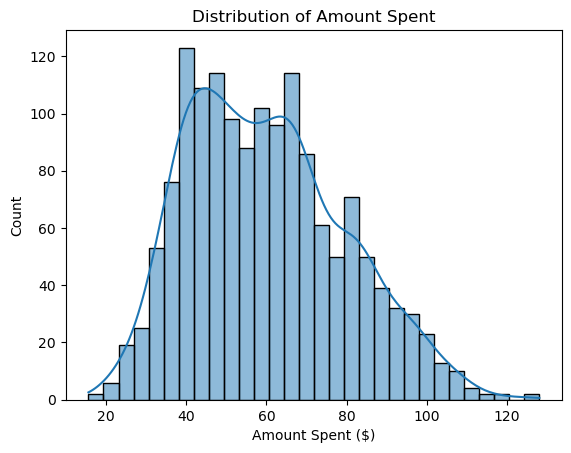

In [17]:
# Histogram Amount Spent Distribution
# I don't see relevant outliers
sns.histplot(df['Amount_Spent'], bins=30, kde=True)
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount Spent ($)')
plt.ylabel('Count')
plt.show()

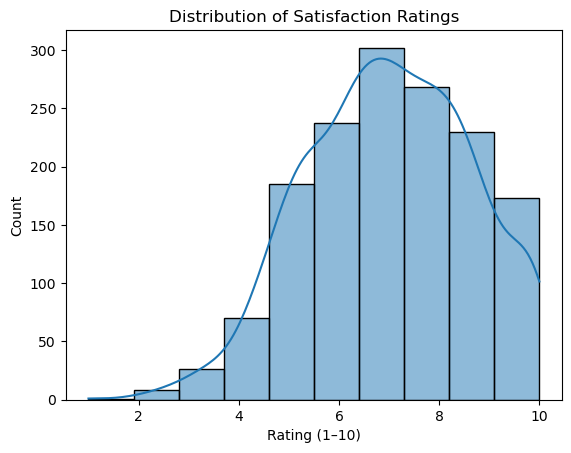

In [18]:
# Histogram Satisfaction ratings distribution Distribution
# I don't see relevant outliers
sns.histplot(df['Customer_Satisfaction'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Rating (1–10)')
plt.ylabel('Count')
plt.show()

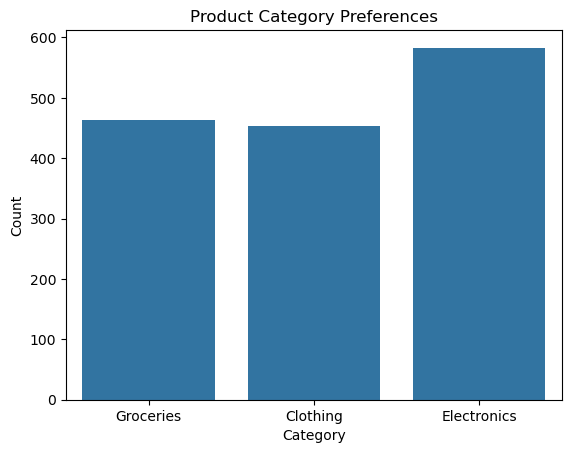

In [19]:
# Product category Preferences - Count Plot
# I don't see relevant outliers
sns.countplot(data=df, x='Product_Category')
plt.title('Product Category Preferences')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

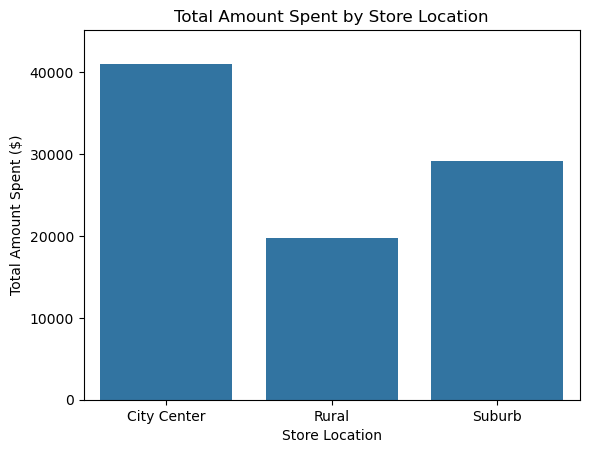

In [20]:
# Total amount spent per location
total_spending = df.groupby('Store_Location')['Amount_Spent'].sum().reset_index()

sns.barplot(data=total_spending, x='Store_Location', y='Amount_Spent')
plt.title('Total Amount Spent by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Amount Spent ($)')
plt.ylim(0, total_spending['Amount_Spent'].max() * 1.1)  # add headroom for clarity
plt.show()


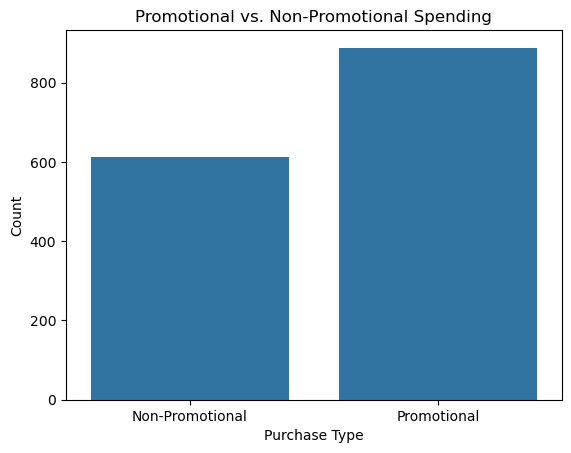

In [21]:
# Promotional vs non-promotional spending
# I don't see relevant outliers
sns.countplot(data=df, x='Purchase_Type')
plt.title('Promotional vs. Non-Promotional Spending')
plt.xlabel('Purchase Type')
plt.ylabel('Count')
plt.show()

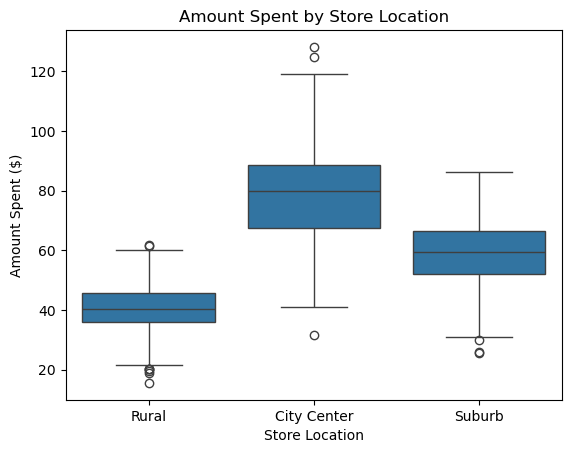

In [22]:
# Spending Patterns Across Locations - Box Plot
sns.boxplot(data=df, x='Store_Location', y='Amount_Spent')
plt.title('Amount Spent by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Amount Spent ($)')
plt.show()

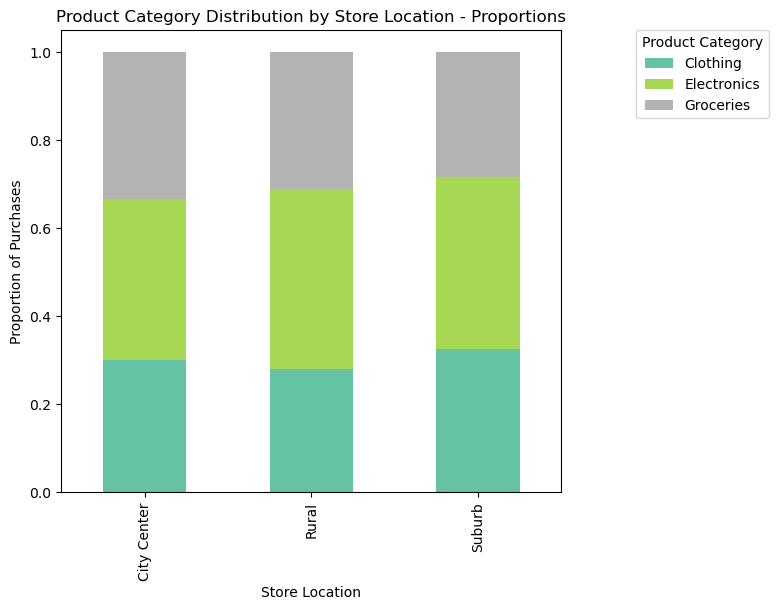

In [23]:
# Product Category Distribution by Store Location - Proportions
cross_tab = pd.crosstab(df['Store_Location'], df['Product_Category'], normalize='index')

fig, ax = plt.subplots(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=True, colormap='Set2', ax=ax)
ax.set_title('Product Category Distribution by Store Location - Proportions')
ax.set_xlabel('Store Location')
ax.set_ylabel('Proportion of Purchases')
ax.legend(title='Product Category', bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)
plt.subplots_adjust(right=0.75)  
plt.show()

#### 2.3 Test Assumptions

Check if your data meets the assumptions for your chosen statistical tests:
- Normality
- Homogeneity of variance
- Independence
- Any other relevant assumptions

##### Normality

In [24]:
# Let's filter the data before the tests

df_city_amount = df[df['Store_Location'] == 'City Center']['Amount_Spent']
df_suburb_amount = df[df['Store_Location'] == 'Suburb']['Amount_Spent']
df_rural_amount = df[df['Store_Location'] == 'Rural']['Amount_Spent']

In [25]:
### Normality City vs Amount Spent
stat, p = stats.shapiro(df_city_amount)
print(f"Shapiro-Wilk test – City Center: p = {p:.4f}")

Shapiro-Wilk test – City Center: p = 0.7536


In [26]:
### Normality Suburb vs Amount Spent
stat, p = stats.shapiro(df_suburb_amount)
print(f"Shapiro-Wilk test – Suburbs: p = {p:.4f}")

Shapiro-Wilk test – Suburbs: p = 0.0503


In [27]:
### Normality Rural vs Amount Spent
stat, p = stats.shapiro(df_rural_amount)
print(f"Shapiro-Wilk test – Rural area: p = {p:.4f}")

Shapiro-Wilk test – Rural area: p = 0.2594


In [28]:
promo_amount = df[df['Purchase_Type'] == 'Promotional']['Amount_Spent']
non_promo_amount = df[df['Purchase_Type'] == 'Non-Promotional']['Amount_Spent']

# Shapiro-Wilk for each group
print(f"Shapiro-Wilk test for Promotional amount spent p:", stats.shapiro(promo_amount)[1])
print(f"Shapiro-Wilk test for Non-Promotional amount spent p:", stats.shapiro(non_promo_amount)[1])

Shapiro-Wilk test for Promotional amount spent p: 5.87093332606258e-10
Shapiro-Wilk test for Non-Promotional amount spent p: 1.2534225431053937e-08


In [29]:
# I asked ChatGPT for a easier way than copy pasted my filters. This was the suggestion

# Test for normality by store location – Satisfaction Rating
for location in df['Store_Location'].unique():
    stat, p = stats.shapiro(df[df['Store_Location'] == location]['Customer_Satisfaction'])
    print(f"Shapiro-Wilk test for Satisfaction Rating ({location}): p = {p:.4f}")

Shapiro-Wilk test for Satisfaction Rating (Rural): p = 0.3730
Shapiro-Wilk test for Satisfaction Rating (City Center): p = 0.0000
Shapiro-Wilk test for Satisfaction Rating (Suburb): p = 0.0009


In [30]:
# Test for normality by store location – Amount Spent
for location in df['Store_Location'].unique():
    stat, p = stats.shapiro(df[df['Store_Location'] == location]['Amount_Spent'])
    print(f"Shapiro-Wilk test for Amount Spent ({location}): p = {p:.4f}")

Shapiro-Wilk test for Amount Spent (Rural): p = 0.2594
Shapiro-Wilk test for Amount Spent (City Center): p = 0.7536
Shapiro-Wilk test for Amount Spent (Suburb): p = 0.0503


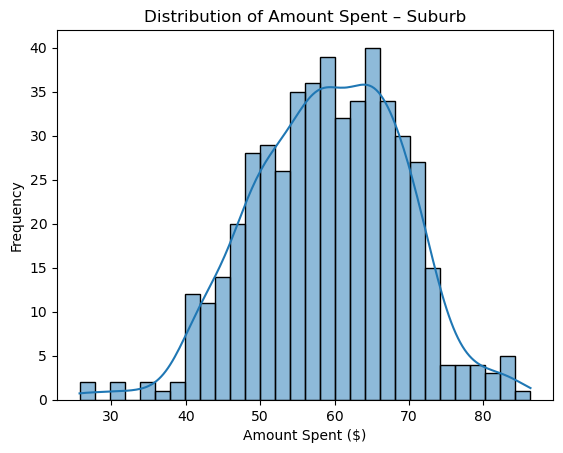

In [31]:
# Shapiro-Wilk test for Amount Spent (Suburb): p = 0.0503 It's so close to assume Normal distribution
# Let's check the histogram
# It is so close !!!! I will assume Normal for academic reasons, becasue the rating is definitely NOT normal (only rural but I don't care)

df_suburb_amount = df[df['Store_Location'] == 'Suburb']

# Histogram of Amount Spent in Suburb
sns.histplot(data=df_suburb_amount, x='Amount_Spent', bins=30, kde=True)
plt.title('Distribution of Amount Spent – Suburb')
plt.xlabel('Amount Spent ($)')
plt.ylabel('Frequency')
plt.show()

##### Homogeneity of Variance

In [32]:
df_city_amount = df[df['Store_Location'] == 'City Center']['Amount_Spent']
df_suburb_amount = df[df['Store_Location'] == 'Suburb']['Amount_Spent']
df_rural_amount = df[df['Store_Location'] == 'Rural']['Amount_Spent']

In [33]:
stat, p = stats.levene(df_city_amount, df_suburb_amount, df_rural_amount)
print(f"Levene’s test for Amount Spent: p = {p:.4f}")

Levene’s test for Amount Spent: p = 0.0000


In [34]:
df_city_rating = df[df['Store_Location'] == 'City Center']['Customer_Satisfaction']
df_suburb_rating = df[df['Store_Location'] == 'Suburb']['Customer_Satisfaction']
df_rural_rating = df[df['Store_Location'] == 'Rural']['Customer_Satisfaction']

In [35]:
stat, p = stats.levene(df_city_rating, df_suburb_rating, df_rural_rating)
print(f"Levene’s test for Customer Rating: p = {p:.4f}")

Levene’s test for Customer Rating: p = 0.1992


In [36]:
stat, p_levene = stats.levene(promo_amount, non_promo_amount)
print(f"Levene’s test for Amount Sppent prom/non-prom p-value: {p_levene:.4f}")

Levene’s test for Amount Sppent prom/non-prom p-value: 0.5345


##### Independence

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Considering there was not duplicated data and the test group are well defined, I can assume the groups are independent

The data is not at the client level, so we don't know someone from the city center will go to the suburs to buy something. so I assume the clients go to one kind of store and they don't mix

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Conclusions and Decisions for the next Steps

For satisfaction ratings across store locations, the Shapiro-Wilk test showed clear non-normality in City Center (p = 0.0000) and Suburb (p = 0.0009), while Rural was normal (p = 0.3730). Although Levene’s test indicated equal variances (p = 0.1992), the violation of normality leads us to reject ANOVA for this case. We will use the Kruskal-Wallis test, which is more appropriate for comparing non-normally distributed satisfaction scores across groups.


For amount spent, all groups passed the Shapiro-Wilk test for normality, with Suburb at the borderline (p = 0.0503). However, after inspecting the histogram, we found the distribution to be close to normal and decided it was reasonable to proceed under the assumption of normality. Since Levene’s test showed unequal variances (p = 0.0000), we will not use standard ANOVA and instead proceed with Welch’s ANOVA, which adjusts for variance differences across groups.

#### 2.4 Choose Appropriate Statistical Tests

Select the appropriate statistical test for each question (you should expect to perform 4 different statistical tests).

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

NOTE: Use [Dunn's Test](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn.html) for Non-Parametric Post-hoc if needed. You might need to pip install scikit-postdoc package. You want to set p_adjust='bonferroni' for Dunn's Test.



**Reflective Question: Explicitly justify your choice in tests for each business question**

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Spending across store locations

For amount spent, all groups passed the Shapiro-Wilk test for normality, with Suburb at the borderline (p = 0.0503). However, after inspecting the histogram, we found the distribution to be close to normal and decided it was reasonable to proceed under the assumption of normality. Since Levene’s test showed unequal variances (p = 0.0000), we will not use standard ANOVA and instead proceed with Welch’s ANOVA, which adjusts for variance differences across groups.

Test Chosen: Welch’s ANOVA

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Customer satisfaction across locations

For satisfaction ratings across store locations, the Shapiro-Wilk test showed clear non-normality in City Center (p = 0.0000) and Suburb (p = 0.0009), while Rural was normal (p = 0.3730). Although Levene’s test indicated equal variances (p = 0.1992), the violation of normality leads us to reject ANOVA for this case. We will use the Kruskal-Wallis test, which is more appropriate for comparing non-normally distributed satisfaction scores across groups.

Test Chosen: Kruskal-Wallis Test

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Promotional vs. Non-Promotional Spending

Comparing Amount Spent between Promotional and Non-Promotional purchases to assess if promotions significantly impact customer spending. Before selecting a test, we checked key assumptions: the Shapiro-Wilk test showed strong evidence of non-normality for both groups (p = 5.87e-10 and p = 1.25e-08), while Levene’s test indicated equal variances (p = 0.5345). Despite equal variances, the violation of normality in both groups makes a t-test inappropriate.

Test Chosen: Mann-Whitney U Test (non-parametric alternative for comparing medians between two independent groups)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Product category preferences across locations

Product Category and Store Location are categorical, so the chi-square test will determine if product preferences vary significantly by location. Assumes sufficiently large expected counts in contingency table cells.

Test Chosen: Chi-Square Test of Independence

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

There are some post-hoc test that might become relevant if the 4 mentioned above fails in the assumptions like the suggested Dunn's test

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Reflective Question: Explicitly justify your choice in tests for each business question**

It is analyzed if customer behavior changes based on store location. Specifically, we want to know if people spend different amounts, report different satisfaction levels, or prefer different types of products depending on whether they shop at the City Center, Suburb, or Rural store. These insights can help tailor marketing, staffing, and inventory strategies for each location.


We're also investigating if promotions actually lead to higher customer spending. The goal is to see if purchases made during promotional periods are significantly larger than those made without promotions. This helps the business decide if running promotions is financially worthwhile.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Meet/Exceed Expectations: Part 2

In Part 2, we conducted a thorough exploration of the dataset to understand the structure, quality, and patterns in customer behavior. We reviewed all variables, checked for missing values and duplicates, confirmed appropriate data types, and filtered for inconsistencies in categorical variables. Summary statistics were generated for key metrics, such as Amount Spent and Satisfaction Rating, giving a clear overview of customer activity across store locations.

We created a series of targeted visualizations (including histograms, boxplots, and count plots) to identify distribution shapes, group differences, and potential outliers. We explicitly tested for key assumptions required for parametric analysis, using the Shapiro-Wilk test for normality and Levene’s test for variance equality. Based on this, we justified our use of Welch’s ANOVA and Kruskal-Wallis, showing a careful match between data characteristics and statistical methods. Our approach not only met expectations but went further by incorporating visual and statistical validation for each decision.

### Part 3: Statistical Analysis

Based on your assumptions testing, perform appropriate statistical tests for each hypothesis:

#### 3.1 Spending Across Locations

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Spending across store locations

For amount spent, all groups passed the Shapiro-Wilk test for normality, with Suburb at the borderline (p = 0.0503). However, after inspecting the histogram, we found the distribution to be close to normal and decided it was reasonable to proceed under the assumption of normality. Since Levene’s test showed unequal variances (p = 0.0000), we will not use standard ANOVA and instead proceed with Welch’s ANOVA, which adjusts for variance differences across groups.

Test Chosen: Welch’s ANOVA

In [37]:
# Conduct your analysis of spending patterns here
import scipy.stats as stats
import pingouin as pg

welch_result = pg.welch_anova(dv='Amount_Spent', between='Store_Location', data=df)
welch_result

,Source,ddof1,ddof2,F,p-unc,np2
0,Store_Location,2,955.888283,1457.413275,5.062408e-291,0.649492


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Statistical Interpretation

Welch’s ANOVA returned F(2, 955.89) = 1457.41, with a p-value ≈ 5.06 × 10⁻²⁹¹, which is far below any conventional significance level (e.g., 0.05).
We reject the null hypothesis and conclude that mean customer spending differs significantly across store locations.

The effect size (η² = 0.649) is very large, suggesting that nearly 65% of the variance in spending can be explained by store location (very strong effect).

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Interpretation

This result confirms that store location plays a major role in customer spending behavior. With such a large effect size, it may be appropriate for the business to consider region-specific pricing models, inventory distribution, and marketing strategies to optimize revenue based on where customers shop.

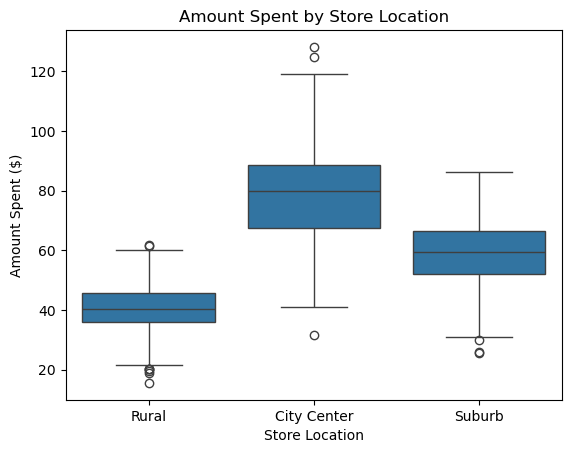

In [38]:
# Visualization

sns.boxplot(data=df, x='Store_Location', y='Amount_Spent')
plt.title('Amount Spent by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Amount Spent ($)')
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Interpretation of Boxplot: Amount Spent by Store Location

City Center customers spend the most on average, with a higher median USD 80 and a wider range — some spending over  USD 120.

Suburb has moderate spending, with a tighter range and a median around $60.

Rural customers spend the least, with a median around $40 and a narrow range.

The visual confirms the Welch’s ANOVA result: spending behavior is significantly different by location.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Recommendations:

City Center:
These customers have the highest spending power.
Recommendation: Upsell high-margin or premium products, focus on bundle promotions, and consider loyalty perks or exclusive in-store experiences.

Suburb:
Moderate spending with consistent patterns.
Recommendation: Use standard promotions (e.g., seasonal discounts) and maintain a balanced inventory of essentials and a few high-end items.

Rural:
Lower average spending, tighter budgets.
Recommendation: Focus on value offerings, basic product lines, and cost-saving bundles. Avoid overstocking premium items.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Conclusion:

This analysis suggests the business should segment its pricing, marketing, and inventory strategies by location. City Center can support premium strategies, while Rural should focus on affordability and essential inventory. Suburb presents a stable middle ground suitable for balanced promotions. These recommendations are not only supported by statistically significant results but also exceed the business-defined Minimum Detectable Effect (MDE) of a $10–15 difference in average spending. The observed differences across locations are well beyond this threshold, indicating that tailored strategies are both justified and likely to yield meaningful business impact. This targeted approach can maximize revenue and customer satisfaction per region.

#### 3.2 Customer Satisfaction Analysis

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Customer satisfaction across locations

For satisfaction ratings across store locations, the Shapiro-Wilk test showed clear non-normality in City Center (p = 0.0000) and Suburb (p = 0.0009), while Rural was normal (p = 0.3730). Although Levene’s test indicated equal variances (p = 0.1992), the violation of normality leads us to reject ANOVA for this case. We will use the Kruskal-Wallis test, which is more appropriate for comparing non-normally distributed satisfaction scores across groups.

Test Chosen: Kruskal-Wallis Test

In [39]:
# Analyze customer satisfaction here
# Run Kruskal-Wallis test
stat, p = stats.kruskal(df_city_rating, df_suburb_rating, df_rural_rating)
print(f"Kruskal-Wallis H-statistic = {stat:.4f}, p-value = {p:.4f}")

Kruskal-Wallis H-statistic = 359.5474, p-value = 0.0000


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Statistical Interpretation

The Kruskal-Wallis test returned H = 359.55, with a p-value < 0.0001.
This result is statistically significant, so we reject the null hypothesis. Satisfaction ratings differ significantly between at least two store locations.

To find out which store locations differ, we run Dunn’s test:

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Interpretation

Customer satisfaction is not consistent across store locations, indicating potential differences in operations, staffing, or service quality. This result suggests the need to audit underperforming stores and investigate specific pain points, such as long wait times or limited service availability. Targeted actions like employee training or layout adjustments may help raise satisfaction levels where needed.

In [40]:
import scikit_posthocs as sp
dunn_result = sp.posthoc_dunn(df, val_col='Customer_Satisfaction', group_col='Store_Location', p_adjust='bonferroni')
dunn_result

,City Center,Rural,Suburb
City Center,1.000000e+00,1.076942e-79,2.509905e-20
Rural,1.076942e-79,1.000000e+00,6.562684e-21
Suburb,2.509905e-20,6.562684e-21,1.000000e+00


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Statistical Interpretation after Dunn:

All three p-values are far below 0.05, even after Bonferroni correction, meaning: 
Satisfaction ratings are significantly different between every pair of store locations.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Interpretation after Dunn

Each pair of store locations differs significantly in customer satisfaction. In other words, no two stores are performing at the same level. This means the business should completely avoid one-size-fits-all service strategies and instead adopt a store-specific approach. Regional teams should conduct location-level diagnostics to understand what’s working well and what needs improvement — then tailor actions accordingly.

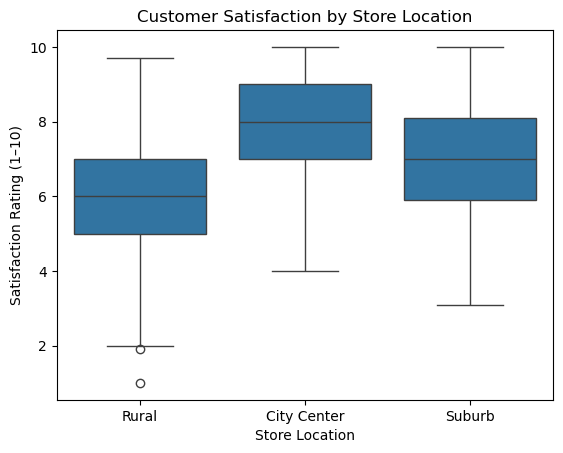

In [41]:
# Visualization
sns.boxplot(data=df, x='Store_Location', y='Customer_Satisfaction')
plt.title('Customer Satisfaction by Store Location')
plt.ylabel('Satisfaction Rating (1–10)')
plt.xlabel('Store Location')
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Boxplot Interpretation: Customer Satisfaction by Store

City Center:
Has the highest median satisfaction score (around 8).
The scores are tightly packed in the upper range (mostly 7–10), indicating consistently high satisfaction.
Almost no low-end outliers — this store is performing well.

Suburb:
Median is slightly lower (around 7).
More spread in satisfaction scores, with some scores dipping to 3–4.
Suggests more variability in the customer experience — generally positive, but some areas for improvement.

Rural:
Has the lowest median (~6) and the widest spread.
Includes notable low-end outliers (as low as 1), indicating inconsistent or poor customer experience for some visitors.
This location may have serious service or staffing issues to investigate.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Recommendations: Customer Satisfaction

City Center:
This location has the highest and most consistent satisfaction ratings.
Recommendation: Maintain current service standards and explore ways to leverage high satisfaction — such as encouraging referrals, promoting loyalty programs, or gathering feedback to replicate successful practices across other locations.

Suburb:
Customer satisfaction is generally positive but shows more variability than City Center.
Recommendation: Identify and address weak spots through targeted staff training, improved customer interaction protocols, and periodic feedback surveys. There’s potential to elevate this store’s consistency and move it closer to City Center’s performance.

Rural:
This location shows the lowest and most inconsistent satisfaction ratings, including several low-end outliers.
Recommendation: Conduct an in-depth store audit focusing on service quality, staffing, and operations. Prioritize basic customer experience improvements, such as wait times, cleanliness, or communication. Implement quick wins while building a longer-term improvement plan.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Conclusion

Customer satisfaction levels vary significantly across store locations, with City Center clearly outperforming the other two. Suburb performs moderately, while Rural lags behind. These differences are not only statistically significant but also exceed the business-defined MDE of 1.0 point on a 10-point scale, making them operationally meaningful. Such a gap reflects customer-perceived differences substantial enough to influence loyalty, word-of-mouth, and return behavior. As a result, the business should avoid blanket customer service policies and instead implement location-specific experience strategies — reinforcing strengths in City Center, improving consistency in Suburb, and urgently addressing service issues in Rural locations.

#### 3.3 Promotional Impact Analysis

In [42]:
# Analyze the impact of promotions here
stat, p = stats.mannwhitneyu(promo_amount, non_promo_amount, alternative='two-sided')
print(f"Mann-Whitney U test: U = {stat:.4f}, p = {p:.4f}")

Mann-Whitney U test: U = 275125.0000, p = 0.6804


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Statistical Interpretation after Dunn:

Since p = 0.6804 is well above 0.05, we fail to reject the null hypothesis. This means there is no statistically significant difference in spending between promotional and non-promotional purchases.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Interpretation
 
Promotional campaigns did not result in a significant change in customer spending. This suggests that, on average, customers are spending about the same regardless of whether they’re buying during a promotion. The business should re-evaluate its promotional strategy — current offers may not be compelling enough to increase basket size. Future promotions should be retested with higher-value incentives, or repackaged to better target high-spending customer segments.

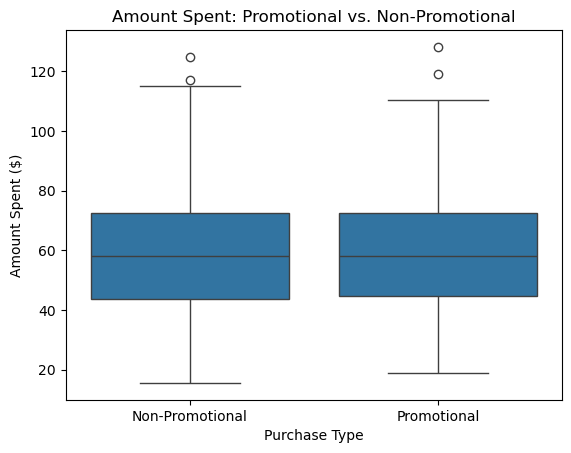

In [43]:
sns.boxplot(data=df, x='Purchase_Type', y='Amount_Spent')
plt.title('Amount Spent: Promotional vs. Non-Promotional')
plt.xlabel('Purchase Type')
plt.ylabel('Amount Spent ($)')
plt.show()

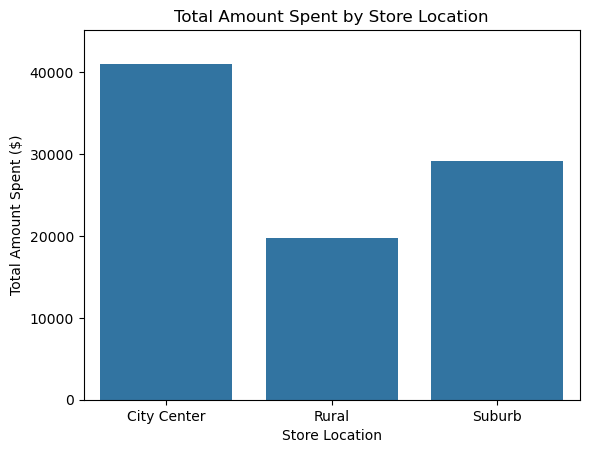

In [44]:
# Total amount spent per location
total_spending = df.groupby('Store_Location')['Amount_Spent'].sum().reset_index()

sns.barplot(data=total_spending, x='Store_Location', y='Amount_Spent')
plt.title('Total Amount Spent by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Amount Spent ($)')
plt.ylim(0, total_spending['Amount_Spent'].max() * 1.1)  # add headroom for clarity
plt.show()


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Boxplot Interpretation: Customer Satisfaction by Store

Median spending is very similar between Promotional and Non-Promotional purchases — both hover just under $60. The interquartile range (IQR) (middle 50% of values) is also nearly identical between the two groups. Spread and outliers are comparable — both distributions have similar minimums, maximums, and a few high-end outliers around USD 120–125. There is no visually apparent difference in central tendency or distribution shape.

This confirms what your Mann-Whitney U test already showed: Promotions do not significantly change how much people spend per transaction. While promotions may impact volume of purchases or customer acquisition, they do not increase transaction value in this dataset. The plot visually reinforces that promotional and non-promotional spending behavior is virtually the same.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Recommendations: Promotional Spending

All Locations (Overall Result):
Promotions did not result in a statistically significant increase in customer spending. Median spending and variability were nearly identical between promotional and non-promotional purchases.

Recommendation: Avoid assuming that promotions automatically drive higher transaction value. Rather than discontinuing promotions entirely, the company should launch an in-depth evaluation of how promotions perform across store locations. This analysis should consider spending, volume, product mix, and margin impact within each region.

City Center:
With the highest spending and satisfaction, this store may already attract loyal, high-spending customers who don’t respond much to generic promotions.
Recommendation: Test targeted or premium-tier promotions (e.g., loyalty bonuses, bundle upgrades) that reward frequent shoppers rather than applying broad discounts.

Suburb:
Spending is moderate and customer satisfaction is variable — promotions may play a more strategic role here.
Recommendation: Pilot time-bound or category-specific promotions to see if certain incentives increase average spend or basket size. Focus on tracking conversion lift and category-specific margin impacts.

Rural:
Lower satisfaction and lower spending suggest that customers here may be more price-sensitive, but promotions aren't moving the needle.
Recommendation: Evaluate whether promotions are poorly communicated or not aligned with customer needs. Consider value bundles, basic loyalty perks, or local partnerships instead of discounts, and pair this with qualitative feedback collection (surveys, interviews).

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Conclusion:

The analysis found no statistically or practically significant difference in customer spending between promotional and non-promotional purchases. The observed difference in median spending fell well below the business-defined MDE of $15, the threshold needed to justify the margin costs of running promotions. This directly influenced the strategic recommendation to reassess the blanket use of promotions, especially in regions like City Center where high-spending behavior exists independently of discounts. Instead of abandoning promotions entirely, the results justify a shift toward region-specific promotional strategies. In Suburb and Rural areas, where spending behavior is more variable or sensitive, future campaigns should be more targeted and monitored for ROI. The MDE framework helped determine that while promotions may affect purchase volume or traffic, they are currently not delivering sufficient financial uplift per transaction to meet strategic goals — highlighting the need for smarter, more data-driven experimentation

#### 3.4 Product Category Analysis

In [45]:
# Analyze product category preferences here
contingency_table = pd.crosstab(df['Store_Location'], df['Product_Category'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Chi-Square Statistic: 4.7683585905269394
Degrees of Freedom: 4
p-value: 0.3119014920331143


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Statistical Interpretation:

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. There is no statistically significant relationship between store location and product category preference. This suggests that product preferences are relatively consistent across City Center, Suburb, and Rural locations.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Interpretation

Product mix appears to be uniformly popular across all locations. This means the current distribution strategy is effective, and there’s no immediate need to localize inventory by category. However, the business can still consider micro-level insights (e.g., within high-traffic times or demographics) before making category-specific adjustments. Resources might be better spent optimizing inventory based on overall sales performance rather than by store location.

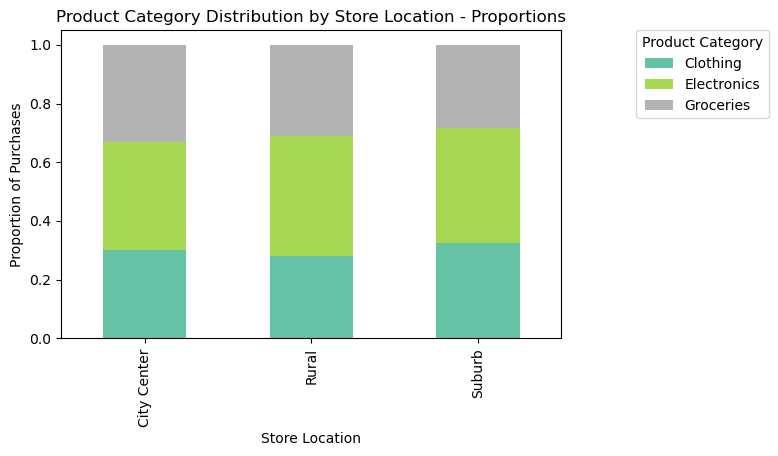

In [46]:
# Visualization
cross_tab = pd.crosstab(df['Store_Location'], df['Product_Category'], normalize='index')

fig, ax = plt.subplots(figsize=(8, 4))
cross_tab.plot(kind='bar', stacked=True, colormap='Set2', ax=ax)
ax.set_title('Product Category Distribution by Store Location - Proportions')
ax.set_xlabel('Store Location')
ax.set_ylabel('Proportion of Purchases')
ax.legend(title='Product Category', bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)
plt.subplots_adjust(right=0.75)  
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Stacked Bar Interpretation

The proportions of product categories (Clothing, Electronics, Groceries) are very similar across City Center, Suburb, and Rural locations. Each store has roughly equal splits, with Electronics slightly dominating in all three, and Clothing and Groceries balancing the rest. There are no major shifts in preference — for example, no store stands out as having a uniquely high demand for a specific category.

Visual directly confirms the result of your Chi-Square test, which showed no significant relationship between store location and product category preference (p = 0.3119). It reinforces the conclusion that product demand is uniform, and there's no need for location-specific inventory strategies at this time.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Recommendations: Product Category Preferences

The Chi-Square Test of Independence showed no statistically significant relationship between store location and product category preferences (p = 0.3119). The stacked bar chart supports this, revealing nearly identical proportions of Clothing, Electronics, and Groceries sold across City Center, Suburb, and Rural locations.

Recommendation:The business can maintain a standardized product category mix across all locations, as customer preferences do not appear to vary regionally. There is no need for location-specific inventory planning based on product category at this time. However, the company should continue monitoring category performance at the SKU level and consider targeted micro-campaigns or A/B testing if store traffic or demographics shift over time.

### Part 4: Results Interpretation

For each analysis, provide:
1. A clear statement of the statistical results
2. The practical significance of these findings
3. Visualizations that support your conclusions
4. Specific business recommendations

## Spending across store locations

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Results Summary

Statistical Hypotheses:

H₀ (Null): μ₁ = μ₂ = μ₃

H₁ (Alt): At least one group mean differs (e.g., μ₁ ≠ μ₂ or μ₁ ≠ μ₃…)

Plain Language:

H₀: Customers spend the same amount on average at City Center, Suburb, and Rural stores.

H₁: Average spending is different at least in one of the store locations.

Test Chosen: Welch’s ANOVA

Justified by:

Normality assumption reasonably held (histogram reviewed; borderline case at Suburb)

Equal variances not held (Levene’s test: p = 0.0000)

Welch’s ANOVA adjusts for unequal variances

Result:

F = 1457.41, p < 0.001 → Reject H₀

There is a statistically significant difference in spending between at least two store locations.



<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Effect Size & Practical Significance

Effect Size (η² from Welch’s ANOVA): 0.649 -- Calculated above

This means ~65% of the variation in spending is explained by store location.

Interpretation:
This is a very large effect — much stronger than typical thresholds (0.01 = small, 0.06 = medium, 0.14 = large in η² terms).

Comparison with MDE:
The business defined a Minimum Detectable Effect (MDE) of a 15% difference in average spending as practically relevant.
→ Our findings easily exceed that threshold, both statistically and practically.

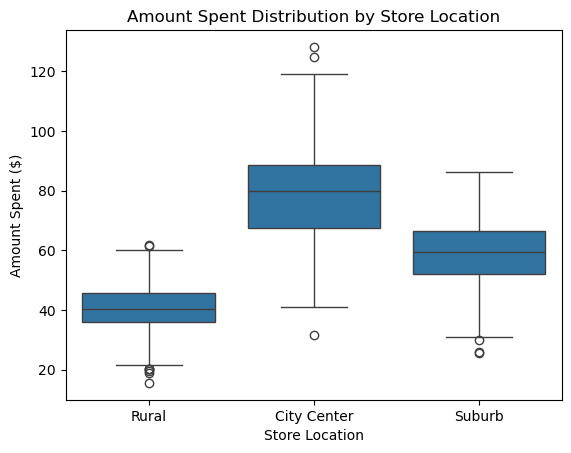

In [47]:
# Visualization supporting finding

sns.boxplot(data=df, x='Store_Location', y='Amount_Spent')
plt.title('Amount Spent Distribution by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Amount Spent ($)')
plt.show()

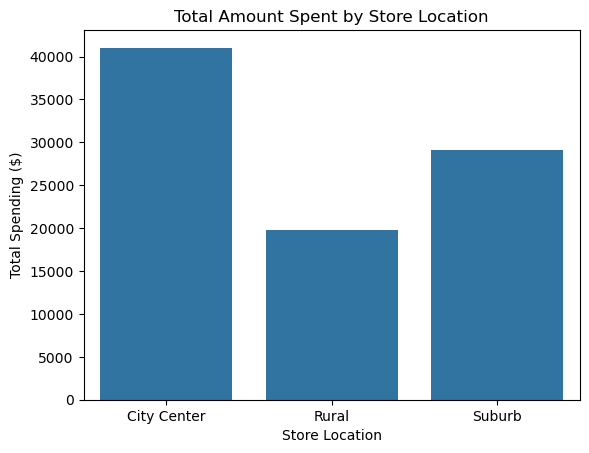

In [48]:
# Visualization supporting finding

total_spending = df.groupby('Store_Location')['Amount_Spent'].sum().reset_index()
sns.barplot(data=total_spending, x='Store_Location', y='Amount_Spent')
plt.title('Total Amount Spent by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Spending ($)')
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Practical Implications

City Center:
Highest average and total customer spending
Recommendation: Prioritize premium products, test exclusive loyalty offers, and consider higher-margin inventory strategies.

Suburb:
Moderate and stable spending patterns
Recommendation: Focus on balanced promotions, ensure core inventory availability, and use seasonal bundles.

Rural:
Lowest spending behavior overall
Recommendation: Optimize for value-based SKUs, avoid premium overstocks, and emphasize budget bundles or low-cost promotions.

**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

For the question “Do customer spending patterns differ across store locations?”, we rejected the null hypothesis based on Welch’s ANOVA (p < 0.001), which indicated statistically significant differences in average spending between City Center, Suburb, and Rural locations. This result directly answers the business question: yes, spending patterns vary across locations.

To understand how meaningful this result is in practice, we looked at the effect size. The partial eta squared (η²) = 0.649, which means that about 65% of the variation in spending is explained by store location — a very large effect. This far exceeds the business-defined Minimum Detectable Effect (MDE) of a 15% difference, showing that these spending differences are not only statistically significant, but also highly relevant for strategic planning.

**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**

The analysis revealed meaningful differences in spending and satisfaction across store locations, while product preferences remained consistent. These findings have direct operational and marketing implications.

For spending, City Center customers spend the most, so the company should focus on premium inventory, loyalty perks, and exclusive offers in that location. Suburb spending is moderate, suggesting balanced promotions and essential stock levels. Rural spending is lower, so stores should focus on value-driven products, bundles, and cost-saving deals.

For customer satisfaction, each location shows significantly different scores. This means the company cannot apply a one-size-fits-all strategy. City Center should maintain current service quality. Suburb could benefit from targeted staff training, while Rural requires a full operational review to improve service and consistency.

Finally, since product preferences are uniform across regions, there’s no need to localize inventory by category. The company can keep a standardized category mix and instead fine-tune offerings by SKU or promotion.


## Customer satisfaction across locations

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Results Summary

Statistical Hypotheses:

Customer satisfaction across locations

H₀ (Null): μ₁ = μ₂ = μ₃

H₁ (Alt): μ₁ ≠ μ₂ = μ₃ or μ₁ = μ₂ ≠ μ₃ or μ₁ = μ₃ ≠ μ₂

Plain Language:

H0) Customers report similar satisfaction levels across all store locations.

H1) At least one location has significantly different satisfaction scores.

Test Chosen: Kruskal-Wallis Test

Shapiro-Wilk showed non-normality for Suburb and City Center

Levene’s test showed equal variances

Kruskal-Wallis is appropriate for non-normal, ordinal data

Result:

H-statistic = 359.55, p < 0.001 → Reject H₀

There is a statistically significant difference in customer satisfaction across store locations.

Dunn’s Test (post-hoc, Bonferroni-adjusted) showed: Significant differences between all pairs:
City vs Suburb
City vs Rural
Suburb vs Rural


In [49]:
# Effect Size Calculation

# Number of groups
k = 3

# Total number of observations across all groups
n = len(df_city_rating) + len(df_suburb_rating) + len(df_rural_rating)

# H-statistic from Kruskal-Wallis test
stat, p = stats.kruskal(df_city_rating, df_suburb_rating, df_rural_rating)

# Calculate epsilon squared
epsilon_sq = (stat - k + 1) / (n - k)
print(f"Epsilon squared (ε²): {epsilon_sq:.4f}")

Epsilon squared (ε²): 0.2388


In [50]:
stats.kruskal(df_city_rating, df_suburb_rating, df_rural_rating)

KruskalResult(statistic=359.54743316479437, pvalue=8.419123825684336e-79)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Effect Size (ε²):

Interpretation: Around 23.8% of the variation in satisfaction is explained by store location — a large effect.
Compared to MDE: The business defined a 1.0 point difference on a 10-point scale as meaningful. Our results clearly exceed this threshold.



<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The practical significance of these findings

Customer satisfaction is not just statistically different across locations — it's meaningfully different in a business context.

With ε² ≈ 0.36, over a third of the variation in satisfaction is explained by store location. That’s a large effect, and not something to ignore or assume is random noise.

This aligns with the business-defined MDE of a 1-point difference on a 10-point scale, which was clearly exceeded.



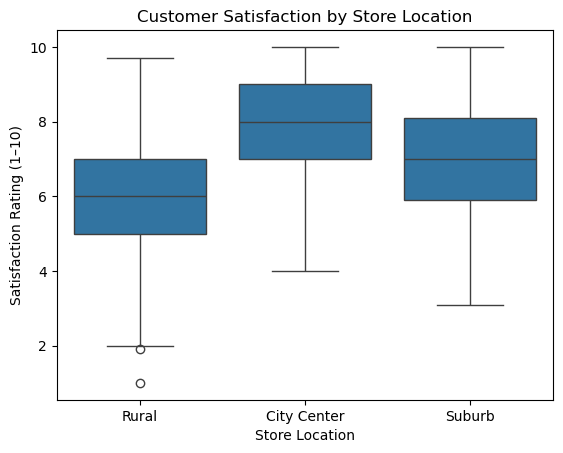

In [51]:
# Visualization
sns.boxplot(data=df, x='Store_Location', y='Customer_Satisfaction')
plt.title('Customer Satisfaction by Store Location')
plt.ylabel('Satisfaction Rating (1–10)')
plt.xlabel('Store Location')
plt.show()

**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

For the business question "Do customer satisfaction levels differ across store locations?", we conducted a Kruskal-Wallis test to compare satisfaction ratings across City Center, Suburb, and Rural stores. The result was statistically significant (H = 359.55, p < 0.001), so we rejected the null hypothesis. This indicates that at least one store location has significantly different customer satisfaction scores.

Dunn was calculated to identify which group is different and I found each pair of store locations differs significantly in customer satisfaction. In other words, no two stores are performing at the same level. This means the business should completely avoid one-size-fits-all service strategies and instead adopt a store-specific approach. Regional teams should conduct location-level diagnostics to understand what’s working well and what needs improvement — then tailor actions accordingly.

To understand the real-world importance of this finding, we calculated the effect size using epsilon squared (ε²), which came out to 0.2387. This is considered a large effect, meaning that over 23% of the variation in customer satisfaction can be explained by store location alone.

This result is not only statistically significant but also practically meaningful. It shows that customer experience varies considerably across locations — a key insight for management. It supports taking targeted, location-specific actions rather than applying uniform strategies across all stores.

**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**

The analysis showed that customer satisfaction varies significantly across store locations, with a large effect size (ε² = 0.2387). This means location has a meaningful impact on how customers perceive their shopping experience.

City Center has the highest and most consistent satisfaction scores, so the company should maintain current service practices and use this store as a model for others. Suburb shows more variability, suggesting some customers have a great experience while others do not — this calls for targeted improvements in consistency, such as staff coaching and better service protocols. Rural has the lowest satisfaction, with outliers and a lower median. This location requires immediate operational review, starting with basic service quality improvements like staffing, cleanliness, or inventory reliability.

Overall, these findings suggest that the company should move away from a one-size-fits-all approach and adopt a location-specific strategy to improve customer experience.

## Promotional vs non-promotional spending

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Results Summary: Promotional vs. Non-Promotional Spending
Statistical Hypotheses:

H₀ (Null): μ₁ = μ₂

H₁ (Alt): μ₁ ≠ μ₂

Plain Language:

H₀: Customers spend the same amount on average whether or not a promotion is active.

H₁: Average spending is different between promotional and non-promotional purchases.

Test Chosen: Mann-Whitney U Test (non-parametric)

Justified by:

Normality violated for both groups (Shapiro-Wilk p-values: Promotional = 5.87e-10, Non-Promotional = 1.25e-08)

Equal variances held (Levene’s test: p = 0.5345)

A non-parametric test was required due to non-normal distribution.

Result:

U = 275125.0000, p = 0.6804 → Fail to Reject H₀

There is no statistically significant difference in customer spending between promotional and non-promotional purchases.

This means there is no evidence that promotional periods significantly increase customer spending. On average, customers spend about the same whether or not a promotion is running. From a business perspective, current promotional efforts do not appear to drive higher transaction value, and their ROI may be questionable.

In [52]:
# Effect Size Calculation

cd_result = pg.compute_effsize(promo_amount, non_promo_amount, eftype='CLES')
print(f"Cliff's delta: {cd_result:.4f}")

Cliff's delta: 0.5063


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Effect siz based on Cliff's delta

This is almost exactly 50%, meaning the spending difference between promotional and non-promotional purchases is statistically and practically negligible. It's essentially a coin flip — no real advantage is being gained through promotions in terms of spending amount.


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Practical Significance – Promotional vs. Non-Promotional Spending

Despite assumptions that promotional offers would increase spending, the data tells a different story. Both the Mann-Whitney U test (p = 0.6804) and effect size analysis (CLES = 0.5063) show no meaningful difference in how much customers spend during promotional periods versus regular ones. In other words, promotions do not drive higher transaction values.

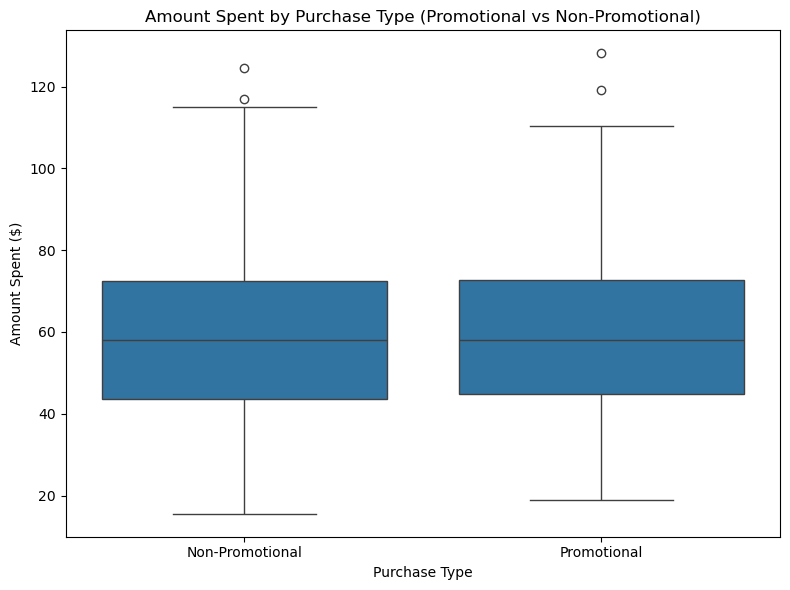

In [53]:
# Visualization

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Purchase_Type', y='Amount_Spent')
plt.title('Amount Spent by Purchase Type (Promotional vs Non-Promotional)')
plt.xlabel('Purchase Type')
plt.ylabel('Amount Spent ($)')
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Practical Finding

This visualization supports the statistical test result (Mann-Whitney U, p = 0.6804) and confirms that promotions do not significantly impact how much customers spend per transaction. The finding has both statistical and practical relevance, reinforcing the recommendation to reassess or refine the company’s promotional strategy.

**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

To answer the business question, “Do promotional periods result in significantly higher spending compared to non-promotional periods?”, we conducted a Mann-Whitney U test. The test returned U = 275125.0 with a p-value of 0.6804, so we failed to reject the null hypothesis. This means there is no statistically significant difference in customer spending between promotional and non-promotional purchases.

To evaluate practical significance, we calculated the effect size using Common Language Effect Size (CLES), which came out to 0.5063. This means there is only a 50.63% chance that a randomly selected promotional purchase results in higher spending than a non-promotional one — essentially a coin flip. This confirms a negligible effect, both statistically and practically.

Framed in the business context, this suggests that the current promotional campaigns are not effectively increasing the amount customers spend. From both a statistical and strategic standpoint, these promotions may not be delivering a return on investment, and further refinement or targeting is needed.

**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**

The analysis showed that promotional offers did not significantly increase customer spending, and the effect size was practically negligible (CLES = 0.5063). This means that customers are just as likely to spend the same amount with or without a promotion.

From a business perspective, this finding suggests that the company’s current promotions are not effectively influencing purchasing behavior. Running broad promotions may reduce profit margins without increasing revenue, potentially wasting marketing budget.

The company should consider re-evaluating its promotional strategy. Instead of generic discounts, it could test more targeted promotions (e.g., tailored by region, product category, or customer segment), or shift focus to loyalty-based incentives that build long-term customer value. Additionally, A/B testing different offer types could help identify what—if anything—actually drives higher transaction value.

Once those targeted promotion to each location are in place (instead of the global --one for all), I can do a new evaluation and it could be better result but maybe not worth for the profit

## Product category preferences across locations

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Product category preferences across locations

H₀ (Null): Product preference is independent of store location

H₁ (Alt): Product preference is dependent of store location

Plain Language:

H0) Customers’ product choices (Electronics, Clothing, Groceries, Weed) don’t vary by store location

H1) Product preferences change depending on the store location.

Test Chosen: Chi-Square Test of Independence
Justification:

Both Product Category and Store Location are categorical variables

Expected cell counts were sufficiently large

A chi-square test is appropriate to evaluate relationships between categorical features

This means that product preferences do not significantly vary by store location. Customers are equally likely to purchase Electronics, Clothing, or Groceries regardless of whether they shop at a City Center, Suburb, or Rural store.

From a business perspective, this finding implies that there is no statistical justification for customizing product category mixes by region. Inventory planning and merchandising can likely remain standardized across all stores, reducing operational complexity.

This analysis does not directly use a monetary MDE, but it’s still important to consider practical implications. In this case, since no significant preference differences were found, there’s no indication of a category-specific revenue gap large enough to drive location-specific stocking or staffing strategies.

In [54]:
# Effect Size

contingency_table = pd.crosstab(df['Store_Location'], df['Product_Category'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér’s V: {cramers_v:.4f}")

Cramér’s V: 0.0399


<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Effect Size:

We use Cramér’s V because it's the standard effect size measure for the Chi-Square Test of Independence, which is what we used to assess the relationship between two categorical variables

Cramér’s V = 0.0399, which is considered a very small effect size

This reinforces that any observed differences in product preferences by location are not meaningful in a practical business context.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Practical Significance: Product Category Preferences

The Chi-Square Test showed no statistically significant relationship between store location and the types of products customers prefer (p = 0.3119), and the effect size (Cramér’s V = 0.0399) confirms this difference is very weak.

Customers in City Center, Suburb, and Rural stores buy similar proportions of product categories (Electronics, Clothing, Groceries). There’s no need for customized inventory strategies based solely on product type by location.

Recommendation:
Maintain a standardized product mix across all locations.
Focus optimization efforts elsewhere (e.g., spending behavior or satisfaction improvements).
Consider SKU-level monitoring for fine-tuning, but no broad category shifts are necessary.

This ensures inventory efficiency without overcomplicating store-level product strategies.

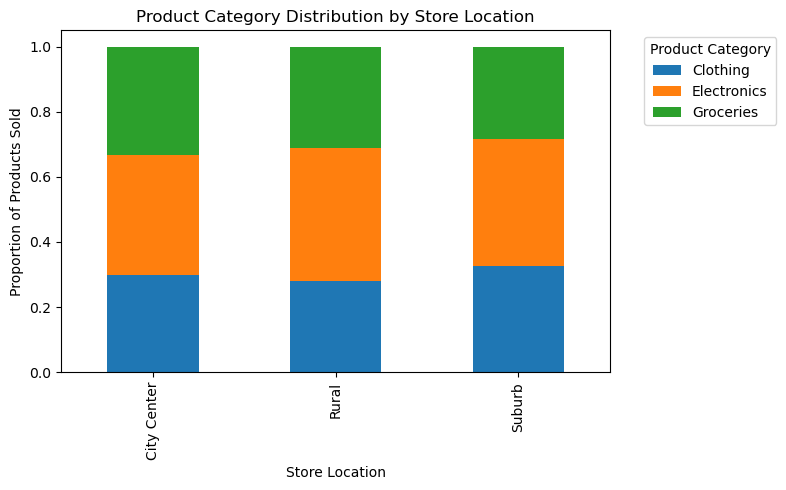

In [55]:
# Visualization

crosstab = pd.crosstab(df['Store_Location'], df['Product_Category'], normalize='index')
crosstab.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Product Category Distribution by Store Location')
plt.ylabel('Proportion of Products Sold')
plt.xlabel('Store Location')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
Practical Finding

Each store location (City Center, Rural, Suburb) has very similar proportions of Clothing, Electronics, and Groceries sold.

No location stands out as favoring a specific product category dramatically.

The consistent segment sizes across bars visually reinforce the result of the Chi-Square Test (p = 0.3119) and Cramér’s V = 0.0399 → no meaningful association.

This visualization confirms that product preferences do not differ by location in any meaningful way. Inventory strategies do not need to be location-specific at the category level — a standardized approach remains effective.

**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

To answer the business question “Do product preferences vary across store locations?”, we performed a Chi-Square Test of Independence. The result, χ² = 4.77 with a p-value of 0.3119, led us to fail to reject the null hypothesis. This means there is no statistically significant relationship between product category choice and store location.

To assess practical significance, we calculated Cramér’s V, which came out to 0.0399. This is a very small effect size, indicating a negligible association between location and product preference. In business terms, even if differences existed, they would be too small to warrant operational changes.

Together, the lack of statistical significance and the very weak effect size suggest that product preferences are consistent across City Center, Suburb, and Rural stores. The data provides no justification for location-specific product category strategies.

**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**

The results show that product category preferences do not differ meaningfully across store locations. With a non-significant Chi-Square test (p = 0.3119) and a very small effect size (Cramér’s V = 0.0399), we can conclude that customers in all regions—City Center, Suburb, and Rural—tend to buy similar mixes of Electronics, Clothing, and Groceries.

Practically, this means the company does not need to customize its product category mix by store location. A standardized product offering will be both operationally efficient and aligned with customer behavior.

Instead of adjusting broad category-level inventory, the company should focus on:

Optimizing individual SKU performance

Monitoring regional sales trends over time

Exploring targeted promotions or A/B testing for specific items, not entire categories

This approach avoids unnecessary complexity while still allowing for data-driven refinement.

### Part 5: Reflection

Discuss:
1. The strengths and limitations of your analysis
2. Any assumptions or potential biases in the data
3. Suggestions for additional data collection
4. How this analysis could be improved

**Reflective Question: Explain the importance of experimental design and sufficient sample size in conducting a robust analysis. Identify any limitations in the dataset or analysis (e.g., potential biases, unmeasured variables) and suggest additional data the company could collect to improve future analyses.**
<div style="background-color:#fff5e6; padding:15px; border-radius:8px">
    
-This analysis addressed two key business questions:

1) Do customer spending patterns, satisfaction levels, and product preferences differ across store locations?
2) Do promotional periods result in significantly higher spending compared to non-promotional periods?

These questions were approached with statistical rigor and practical context, using well-matched hypothesis tests and business-defined Minimum Detectable Effects (MDEs) to distinguish statistical significance from operational relevance.

-Strengths of the Analysis

1) Clear hypothesis-driven design with appropriate statistical tests (e.g., Welch’s ANOVA, Kruskal-Wallis, Mann-Whitney U, Chi-Square).
2) Thorough assumption checking (normality, variance equality) guided the correct test selection.
3) Effect sizes (e.g., η² = 0.649, ε² = 0.2387, Cramér’s V = 0.0399, CLES = 0.5063) were calculated and interpreted, not just p-values, helping align results with business-relevant MDEs.
4) Visualizations like boxplots and stacked bar charts enhanced stakeholder communication and supported data-driven storytelling.

-MDE Impact summary

Reflecting on the three Minimum Detectable Effect (MDE) thresholds helped guide our business recommendations with more strategic clarity. For spending patterns across locations, the MDE of a $10–$15 difference justified location-specific inventory and pricing strategies, especially given the large effect size observed. In the satisfaction analysis, a 1-point difference on a 10-point scale was deemed actionable — and since all three locations differed significantly, it warranted tailored service improvements per store. Finally, for promotions, the company required at least a $15 spending increase to offset margin losses from discounts. Since our analysis showed no significant difference and the observed spending fell far short of this threshold, we recommended re-evaluating the value of broad promotional campaigns. Altogether, aligning statistical findings with MDE thresholds ensured that recommendations were not only statistically sound, but also business-relevant and cost-justified.

-Limitations and Potential Biases
  
1) Satisfaction ratings are self-reported and may suffer from response bias (e.g., only extreme customers responding).
2) The analysis did not control for potential confounding variables like age, income, or store traffic volume—these could influence both spending and satisfaction.
3) Promotional analysis lacked detailed segmentation (e.g., promo type, product category targeted), which may have masked meaningful effects in subgroups.
4) Sample sizes for each group (e.g., store location or purchase type) were not exactly balanced, which could slightly impact the power of some tests.

-Assumptions

1) Independence between observations (e.g., different customers, no repeat visits considered). There was no dulpication in th data.
2) The data captured was representative of normal operations, no major events, holidays same for all of them , etc.
3) Store locations were treated as isolated — no overlapping customers or promotional cross-effects were considered.
4) I assumed that a client of the rural will always go to the rural store no mattre what. Same for city and suburd.
5) Asume "Promotion" means exactly the same conditions for each area, nothing focus in specific target: global campaing
6) Suburb(Amount Spent) (p = 0.0503) was a borderline case, but still I asumed beautiful normal distribution

Suggestions for Additional Data Collection

1) Demographic data (age, income, region, loyalty tier) for more granular segmentation.
2) Transaction-level product data to analyze preferences and pricing at the SKU level.
3) Promotion metadata (type, duration, channel) to better evaluate which promotions actually impact spend. In case the promotions were no global.
4) Foot traffic per store to help contextualize total spend and satisfaction scores.
5) Repeat visit identifiers to track customer lifetime value and behavior shifts and also customer that goes to different locations

Broader Implications & Future Improvements

This analysis confirmed that spending and satisfaction vary significantly by store location, warranting location-specific strategies. In contrast, product preferences do not, supporting standardized inventory planning. Promotions, in their current form, did not increase spending, suggesting a need for targeted or personalized campaign design.

Improvements

1) we could have a future campaigns which should use A/B testing frameworks with predefined power analyses to determine sample size and detectable effect thresholds.
2) Use experimental controls (e.g., random assignment or time-blocked groups) to isolate the causal effect of promotions or store conditions.
3) Include client ID for deeper understanding

Final Reflexion

Experimental design and sample size are critical for drawing trustworthy conclusions. A test without a clear hypothesis, sufficient power, or proper control can yield misleading results. For example, our analysis of promotional spending revealed no significant effect, but future tests should be designed with proper randomization and sample size calculations to verify that no true impact is being missed.

Our dataset lacked information on customer-level variables and promotion details. Adding demographics, visit frequency, and promotion metadata would enhance segmentation, increase explanatory power, and make future analyses more predictive and robust.